In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

Loading and spliting the data


In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print("training images: {}".format(x_train.shape))
print("testing images: {}".format(x_test.shape))


training images: (50000, 32, 32, 3)
testing images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


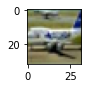

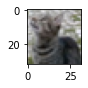

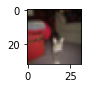

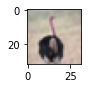

In [ ]:
for i in range(332,336):
  plt.subplots(figsize=(1,1))
  img = x_train[i]
  plt.imshow(img)
  plt.show()

Processing the data


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 225
x_test /= 225

n_classes = 10

print('shape before one-hot encoding: ',y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print('shape after one-hot encoding: ',y_train.shape)


shape before one-hot encoding:  (50000, 1)
shape after one-hot encoding:  (50000, 10)


Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 371s 947ms/step - loss: 1.5360 - accuracy: 0.4400 - val_loss: 1.1663 - val_accuracy: 0.5816
Epoch 2/10
391/391 [==============================] - 367s 938ms/step - loss: 1.1082 - accuracy: 0.6076 - val_loss: 0.9806 - val_accuracy: 0.6547
Epoch 3/10
391/391 [==============================] - 367s 939ms/step - loss: 0.9274 - accuracy: 0.6753 - val_loss: 0.8716 - val_accuracy: 0.6986
Epoch 4/10
391/391 [==============================] - 367s 939ms/step - loss: 0.7939 - accuracy: 0.7223 - val_loss: 0.8614 - val_accuracy: 0.6992
Epoch 5/10
391/391 [==============================] - 367s 940ms/step - loss: 0.6913 - accuracy: 0.7580 - val_loss: 0.8356 - val_accuracy: 0.7123
Epoch 6/10
391/391 [==============================] - 368s 942ms/step - loss: 0.5965 - accuracy: 0.7902 - val_loss: 0.8320 - val_accuracy: 0.7148
Epoch 7/10
391/391 [==============================] - 369s 944ms/step - loss: 0.5110 - accuracy: 0.8196 - val_loss: 0.8684 -

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobil',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names)) 

batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 82ms/step


In [ ]:
print(predictions)

[[3.02621024e-03 4.98951238e-04 3.42787355e-02 2.71007307e-02
  8.33755791e-01 2.27085445e-02 2.60628713e-03 7.33282566e-02
  1.58660999e-03 1.10985222e-03]
 [6.01551961e-04 2.45848409e-04 3.89561169e-02 2.94729583e-02
  1.16063014e-01 9.12001953e-02 7.40895700e-03 7.13653564e-01
  2.27394630e-04 2.17045844e-03]
 [1.18661808e-06 8.83973007e-06 5.20796821e-05 9.51632159e-04
  4.01742136e-06 7.33328416e-05 9.98902082e-01 2.08906022e-06
  3.06769749e-07 4.44294164e-06]
 [2.61778419e-04 5.09895108e-05 1.34749919e-01 4.39964741e-01
  4.54013608e-03 5.36960643e-03 3.53644252e-01 6.38532173e-03
  1.51170752e-04 5.48820831e-02]
 [3.14945190e-08 9.99998569e-01 3.93630187e-15 2.58379255e-13
  5.21236335e-16 5.10692787e-16 6.22938999e-17 6.15245431e-15
  3.50706216e-07 1.07482424e-06]
 [3.01693535e-06 9.99180496e-01 1.26273481e-09 4.94926411e-09
  2.00326325e-10 1.73218995e-09 7.43638884e-09 1.74937576e-09
  2.00121194e-05 7.96545064e-04]
 [2.02478319e-02 6.32421579e-03 3.07687912e-02 4.78373796e

In [ ]:
for image in predictions:
  print(np.sum(image))

0.99999994
1.0000001
1.0
1.0
1.0000001
1.0000001
1.0000001
1.0
1.0000001


In [ ]:
class_results = np.argmax(predictions,axis=-1)
print(class_results)

[4 7 6 3 1 1 3 6 8]


Final object detection


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


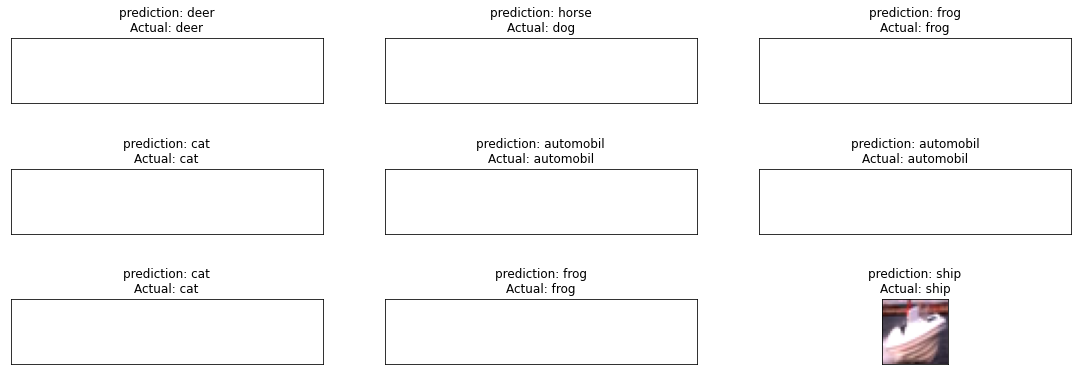

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_results[i] == key:
      title = 'prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

   #plot the image
axs[i].imshow(img)

#show the plot
plt.show()

